# Visual Plant Recognition

This Jupyter Notebook uses a pre-trained Inception v3 architecture to train on the [Oxford 102 dataset](https://www.robots.ox.ac.uk/~vgg/data/flowers/102/). The dataset consists of 102 different plants. PyTorch is used as a framework.

## Dataset Loading

Importing all the necessary frameworks, libraries and classes

In [24]:
from pathlib import Path
from matplotlib import pyplot as plt
from torchvision import transforms, utils, datasets
from torch.utils.data import Dataset, DataLoader

from helper import convert_mat_to_csv
from dataset_loader import Oxford102Dataset, Rescale, RandomCrop, ToTensor
from visualization import image_visualization, batch_visualization

Converting the MatLab files with the labels into a csv

In [2]:
path_dataset = Path("../dataset/")
if not(path_dataset.joinpath("imagelabels.csv").exists()):
    convert_mat_to_csv(path_dataset.joinpath("imagelabels.mat"))
    print("Created image labels")
else: 
    print("Image labels already exist as csv")
if not(path_dataset.joinpath("setid.csv").exists()):    
    convert_mat_to_csv(path_dataset.joinpath("setid.mat"))
    print("Created set id")
else: 
    print("Set id already exist as csv")

Image labels already exist as csv
Set id already exist as csv


Loading the Oxford 102 Dataset with a custome dataloader and visualise it

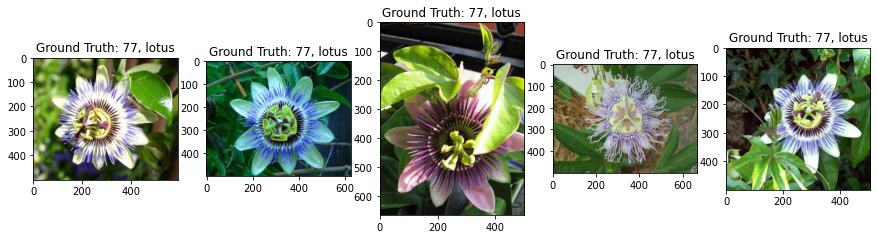

In [3]:
oxford102Dataset = Oxford102Dataset(csv_file='../dataset/imagelabels.csv',
                                    dataset_dir='../dataset/')

batch_visualization(oxford102Dataset, (1, 5), (15, 4))
    


<Figure size 432x288 with 0 Axes>

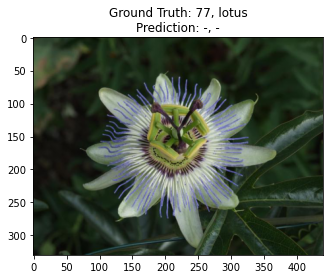

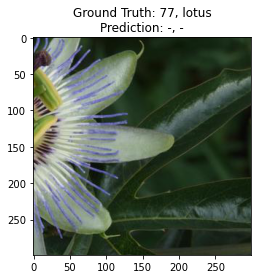

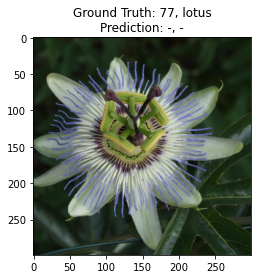

In [20]:
scale = Rescale(330)
crop = RandomCrop(299)
composed = transforms.Compose([Rescale(330),
                               RandomCrop(299)])

# Apply each of the above transforms on sample.
fig = plt.figure()
sample = oxford102Dataset[65]
for i, tsfrm in enumerate([scale, crop, composed]):
    transformed_sample = tsfrm(sample)
    image_visualization(transformed_sample['image'], sample['plant_label'])


plt.show()

Putting everything together and iterating trough the dataset with dataloader

In [25]:
transformed_dataset = Oxford102Dataset(csv_file='../dataset/imagelabels.csv',
                                    dataset_dir='../dataset/',
                                           transform=transforms.Compose([
                                               Rescale(256),
                                               transforms.RandomHorizontalFlip(),
                                               RandomCrop(224),
                                               ToTensor(),
                                               transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                                                     std=[0.229, 0.224, 0.225])
                                           ]))
dataloader = DataLoader(transformed_dataset, batch_size=32,
                        shuffle=True, num_workers=4)